In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv


In [10]:
#importing data and cheking it
data = pd.read_csv('/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv')
data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [12]:
data.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [13]:
data['Average User Rating'].count() 

7561

In [14]:
data['Average User Rating'].isnull().sum()

9446

We have more then 50% of missing values in Average User Rating column, which gives us two ideas:
1) Users don't like to spend time and give rating to applications, so probably they would give scores only for games that somehow affected them in good or bad way, so we can expect a lot of high and low ratings. We can check it later.
2) Due to large amount of missing values rating is not a good indicator of application success. Another usefull parameter would be number of installations, which could help us to understand better if this application is successful or not and users prefferences in general. Sadly, we dont have this parameter in the dataset. So we will process with Average Rating as key parameter of application success
There are 3 main questions that we want to assess:
1) How can we describe a current state of mobile strategy games category and how it evolved over past years? To answer this we will analyse following features - Primary Genre, Genres, Original Release Date,Languages
2) What is the secret of succsesful application? features that characherise application and their success : Average User Rating and its destributions with respect to other features. 

In [15]:
data['New_Release_Date'] = pd.to_datetime(data['Original Release Date'], format ='%d/%m/%Y')
data['Release_Year'] = data['New_Release_Date'].dt.year
data['New_Release_Date'].dt.year.value_counts().reset_index()

,index,New_Release_Date
0,2016,3126
1,2017,2818
2,2018,2504
3,2015,2216
4,2014,1893
5,2019,1570
6,2013,1161
7,2012,729
8,2011,490
9,2010,277


Text(0.5, 1.0, 'Release Date by Year')

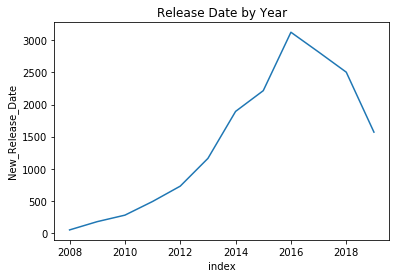

In [16]:
sns.lineplot(x=data['New_Release_Date'].dt.year.value_counts().reset_index().iloc[:,0],
             y=data['New_Release_Date'].dt.year.value_counts().reset_index().iloc[:,1]).set_title("Release Date by Year")

We can see that category reached its peak in 2016 and after that started a sligth dropdown in number of applications released. It might be a signal that category stabilized and number of new developers droped down and big major players that already launched bestseller took their place. 

Text(0.5, 1.0, 'Release Date by Month')

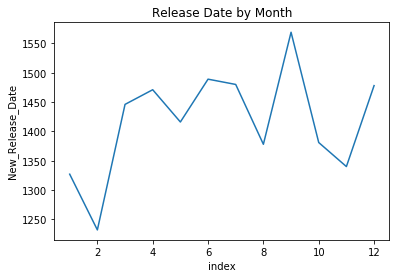

In [17]:
sns.lineplot(x=data['New_Release_Date'].dt.month.value_counts().reset_index().iloc[:,0],
             y=data['New_Release_Date'].dt.month.value_counts().reset_index().iloc[:,1]).set_title("Release Date by Month")

If we look on release date at monthly level, we can see that February is the lest popular month for release of application, while September is the most popular one.  

In [18]:
data['Primary Genre'].value_counts()

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Social Networking        9
Book                     9
News                     7
Health & Fitness         5
Food & Drink             4
Navigation               3
Music                    3
Medical                  2
Shopping                 1
Travel                   1
Name: Primary Genre, dtype: int64

Unsurprisingly, majority of mobile strategies are made in games genre. Lets dig deeper are see what additional information about genres we can get.

In [19]:
#splitting stings with genres
genres = data['Genres'].str.split(', ')
genres

0                       [Games, Strategy, Puzzle]
1                        [Games, Strategy, Board]
2                        [Games, Board, Strategy]
3                       [Games, Strategy, Puzzle]
4             [Games, Strategy, Board, Education]
                           ...                   
17002    [Games, Entertainment, Casual, Strategy]
17003                   [Games, Family, Strategy]
17004                           [Games, Strategy]
17005                   [Games, Strategy, Action]
17006                   [Games, Strategy, Puzzle]
Name: Genres, Length: 17007, dtype: object

In [20]:
#counting single appearance of genre in a list wih a Python
#from collections import Counter
#list = []
#for i in data['Genres']:
#    for genre in i.split(', '):
#        list.append(genre)
#d = Counter(list)
#df = pd.Series(d).to_frame('Frequency')
#df_sorted = df.sort_values(by='Frequency', ascending=False)
#df_sorted['Prc'] = df_sorted['Frequency'] / df_sorted['Frequency'].sum()
#df_sorted


#doing the same with Pandas functionality
Genres = pd.DataFrame(data['Genres'].str.split(', ',expand=True))
Genres = pd.DataFrame(Genres.values.ravel(), columns = ["Genres"])
Genres = pd.DataFrame(Genres['Genres'].value_counts().reset_index())
#Genres['Prc'] = Genres['Genres'] / Genres['Genres'].sum() * 100 
Genres.columns = ['Genres', 'Count']#'Percent of Total']
Genres

,Genres,Count
0,Games,17007
1,Strategy,17006
2,Entertainment,7991
3,Puzzle,3960
4,Simulation,2143
5,Action,2012
6,Board,1722
7,Casual,1697
8,Role Playing,1126
9,Education,951


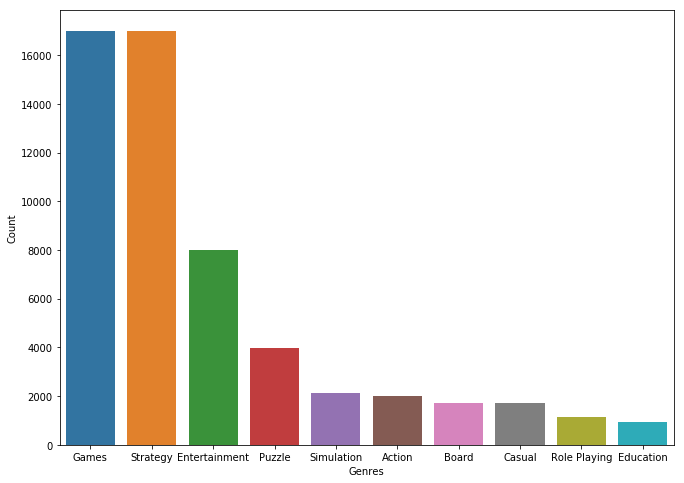

In [21]:
#plottring top-10 genres
plt.figure(figsize=(11,8))
sns.barplot(x='Genres', y ='Count', data=Genres.head(10));

Basicly, genres should be concidered more like keywords for application to be noticed and correctly attributed to category, thus most popular genre tags are games, strategy and entertantment.  

In [22]:
data['Languages'].value_counts()
#for the future machine learning purposes we can transfrom this feature to nominal feature where 1 is 'mono-language game' and 2 is 'multi-language game'
#case data['Languages'].str.len()>2 ->

EN                                                                    12467
EN, ZH                                                                  354
CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR          277
EN, ZH, ZH                                                              248
EN, DE                                                                  147
                                                                      ...  
AR, ZH, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ES, TR                    1
AR, NL, EN, FR, DE, HI, JA, KO, RU, ZH, ES                                1
EN, ZH, TH, ZH                                                            1
CS, EN, JA, SK, ES                                                        1
AR, NL, EN, FR, DE, ID, IT, KO, PL, PT, RU, ZH, ES, TH, ZH, TR, VI        1
Name: Languages, Length: 990, dtype: int64

In [23]:
languages = pd.DataFrame(data['Languages'].str.split(', ',expand=True))
languages = pd.DataFrame(languages.values.ravel(), columns = ["Languages"])
languages = pd.DataFrame(languages['Languages'].value_counts().reset_index())
languages['Prc'] = languages['Languages'] / languages['Languages'].sum() * 100
languages.columns = ['Language', 'Count', 'Percent of Total']
languages.head(10)

,Language,Count,Percent of Total
0,EN,16834,30.469330
1,ZH,4989,9.030028
2,DE,2599,4.704158
3,FR,2526,4.572028
4,ES,2420,4.380170
5,JA,2364,4.278810
6,RU,2179,3.943963
7,IT,1996,3.612735
8,PT,1921,3.476986
9,KO,1919,3.473366


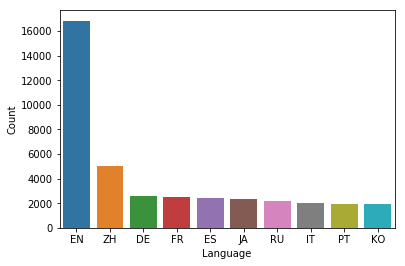

In [24]:
sns.barplot(x="Language", y="Count", data=languages.head(10));

In [25]:
data['Price'].value_counts()

0.00      14212
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
99.99         1
36.99         1
59.99         1
139.99        1
37.99         1
18.99         1
Name: Price, dtype: int64

In [26]:
#transforming Price feature to nominal feature, where 0 is free-to-play game, and 1 is paid game
data.loc[data['Price'] == 0, 'Price'] = 0
data.loc[data['Price'] > 0, 'Price'] = 1


<h2>Current state of mobile strategy games:</h2>
<li>
    2016 was the most successful year for mobile games - over 3000 games was published this year. Which followed with small decline - 2800 in 2017 and 2500 in 2018
<li> Most popular tags for genres are games, strategies and entertainment
<li> English is the most popular language for mobile games. Chinese following

<h2>Part 2</h2>

In [27]:
data.shape

(17007, 20)

In [28]:
data_clean = data.dropna(subset=['Average User Rating'])
data_clean = data_clean.drop(['URL', 'Subtitle','Icon URL','Description', 'Original Release Date', 'Primary Genre', 'Genres','Languages' ], axis=1)
data_clean.shape

(7561, 12)

In [29]:
data_clean.head()

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Size,Current Version Release Date,New_Release_Date,Release_Year
0,284921427,Sudoku,4.0,3553.0,1.0,NaN,Mighty Mighty Good Games,4+,15853568.0,30/05/2017,2008-07-11,2008
1,284926400,Reversi,3.5,284.0,1.0,NaN,Kiss The Machine,4+,12328960.0,17/05/2018,2008-07-11,2008
2,284946595,Morocco,3.0,8376.0,0.0,NaN,Bayou Games,4+,674816.0,5/09/2017,2008-07-11,2008
3,285755462,Sudoku (Free),3.5,190394.0,0.0,NaN,Mighty Mighty Good Games,4+,21552128.0,30/05/2017,2008-07-23,2008
4,285831220,Senet Deluxe,3.5,28.0,1.0,NaN,RoGame Software,4+,34689024.0,22/07/2018,2008-07-18,2008


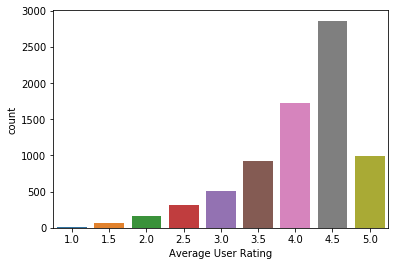

In [30]:
sns.countplot(data_clean['Average User Rating'])

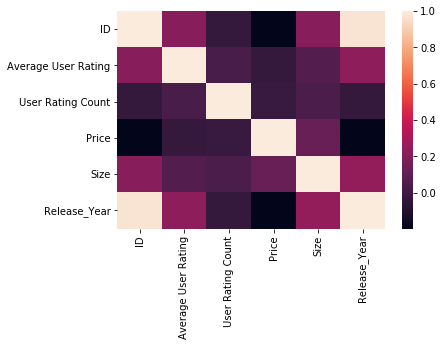

In [31]:
sns.heatmap(data_clean.corr())

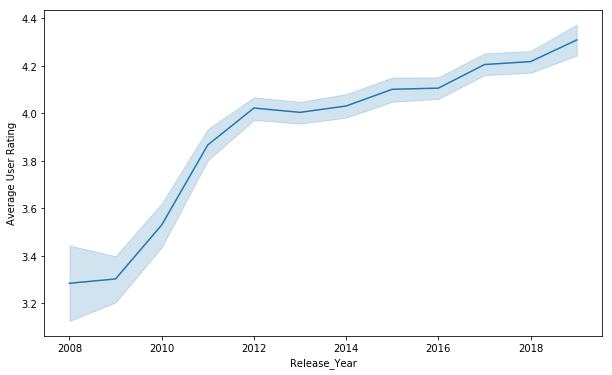

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(data_clean['Release_Year'], data_clean['Average User Rating'])

In [33]:
data_clean['Price'].value_counts()

0.0    6325
1.0    1236
Name: Price, dtype: int64

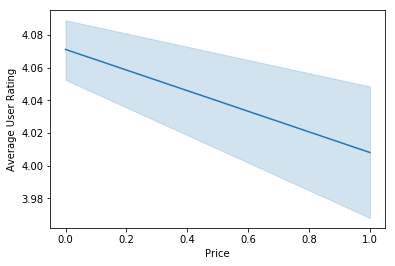

In [34]:
sns.lineplot(data_clean['Price'], data_clean['Average User Rating'])

In [35]:
data_clean[['Price','Average User Rating']].groupby(['Price'], as_index=False).mean()

,Price,Average User Rating
0,0.0,4.071225
1,1.0,4.008091


In [36]:
user_rating = data_clean[['Name','Average User Rating']].groupby(['Name'], as_index=False).mean().sort_values(by='Average User Rating', ascending=False)
user_rating[user_rating['Average User Rating'] == 5]

,Name,Average User Rating
2790,Fantasy Wars,5.0
5789,Shell Beach Underwater Sea Shells - Sea Reward,5.0
3863,Iron Marines,5.0
2137,Cubiks - Cube Puzzle,5.0
2143,Current Stream,5.0
...,...,...
6639,Tic Tac Toe Meme,5.0
3352,Grow Kingdom,5.0
3354,Grow Turret,5.0
3356,Grumpy Aliens Unite,5.0
